In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt 


In [40]:
class MeanSTDCalculator():
    def __init__(self,inputs):
        self.input = inputs
       

    def calculation(self):
        avg_mean = [] #[b,g,r]
        avg_std = []  #[b,g,r]
        
        num_img = len(self.input)

        m_b, s_b = 0.0, 0.0
        m_g, s_g = 0.0, 0.0
        m_r, s_r = 0.0, 0.0


        for each in self.input:
            #print(each)
            image = cv2.imread(each)
            image = cv2.resize(image,(224,224))
            image = image.astype(np.float32)/255
            b,g,r = cv2.split(image)

            # Accumulate sums for mean
            m_b += np.mean(b)
            m_g += np.mean(g)
            m_r += np.mean(r)
    
            # Accumulate sums for std
            s_b += np.std(b)
            s_g += np.std(g)
            s_r += np.std(r)

        # Final mean and std values across all images
        m_b /= num_img
        m_g /= num_img
        m_r /= num_img

        s_b /= num_img
        s_g /= num_img
        s_r /= num_img


        return np.round([m_b, m_g, m_r], 2).tolist(), np.round([s_b, s_g, s_r], 2).tolist()


## Example:

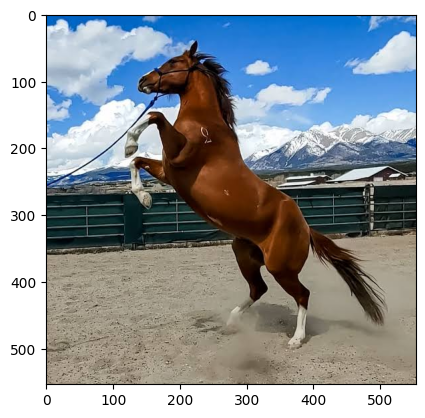

In [28]:
temp_img = '/kaggle/input/horsepic/images.jpeg'
a=cv2.imread(temp_img)
a=cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(a)

In [41]:
myinput = [temp_img]
std_mean = MeanSTDCalculator(myinput)
print(std_mean.calculation())

([0.52, 0.49, 0.46], [0.31, 0.25, 0.26])
